In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
Res = utils.RetrievalResults(
    prefix='../retrieval_outputs/custom_line_opacity_J_B_ret_5/test_', 
    m_set='J1226_A', w_set='J1226'
    )

  analysing data from ../retrieval_outputs/custom_line_opacity_J_B_ret_5/test_.txt


In [3]:
*_, pRT_atm = Res.get_model_spec(return_pRT_atm=True)

In [27]:
print(
    pRT_atm.atm[0].custom_line_TP_grid['HF_main_iso'], 
    #pRT_atm.atm[0].custom_grid['HF_main_iso'], 
    #pRT_atm.atm[0].custom_diffTs['HF_main_iso'], 
    #pRT_atm.atm[0].custom_diffPs['HF_main_iso'], 
    pRT_atm.atm[0].line_grid_kappas_custom_PT['HF_main_iso'].shape
)

[[8.11411360e+01 1.00000000e+00]
 [8.11411360e+01 1.00000000e+01]
 [8.11411360e+01 1.00000000e+02]
 [8.11411360e+01 1.00000000e+03]
 [8.11411360e+01 1.00000000e+04]
 [8.11411360e+01 1.00000000e+05]
 [8.11411360e+01 1.00000000e+06]
 [8.11411360e+01 1.00000000e+07]
 [8.11411360e+01 1.00000000e+08]
 [8.11411360e+01 1.00000000e+09]
 [1.09606774e+02 1.00000000e+00]
 [1.09606774e+02 1.00000000e+01]
 [1.09606774e+02 1.00000000e+02]
 [1.09606774e+02 1.00000000e+03]
 [1.09606774e+02 1.00000000e+04]
 [1.09606774e+02 1.00000000e+05]
 [1.09606774e+02 1.00000000e+06]
 [1.09606774e+02 1.00000000e+07]
 [1.09606774e+02 1.00000000e+08]
 [1.09606774e+02 1.00000000e+09]
 [1.48058622e+02 1.00000000e+00]
 [1.48058622e+02 1.00000000e+01]
 [1.48058622e+02 1.00000000e+02]
 [1.48058622e+02 1.00000000e+03]
 [1.48058622e+02 1.00000000e+04]
 [1.48058622e+02 1.00000000e+05]
 [1.48058622e+02 1.00000000e+06]
 [1.48058622e+02 1.00000000e+07]
 [1.48058622e+02 1.00000000e+08]
 [1.48058622e+02 1.00000000e+09]
 [2.000000

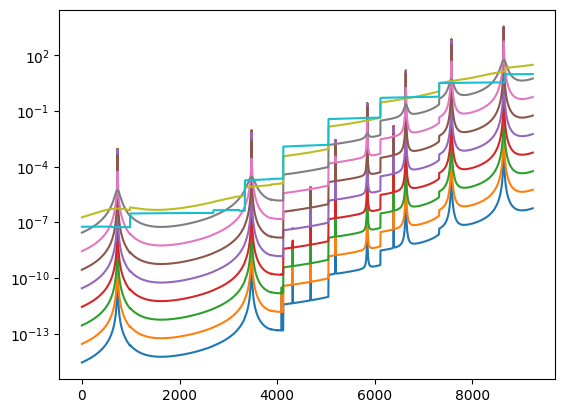

In [26]:
for i, opa_i in enumerate(pRT_atm.atm[0].line_grid_kappas_custom_PT['HF_main_iso'].T):
    plt.plot(opa_i[:,0])

    if i == 9:
        break
plt.yscale('log')
plt.show()

In [29]:
from petitRADTRANS import fort_input as fi
x = fi.interpol_opa_ck(
    pRT_atm.atm[0].press, 
    500*np.ones_like(pRT_atm.atm[0].press), 
    pRT_atm.atm[0].custom_line_TP_grid['HF_main_iso'], 
    pRT_atm.atm[0].custom_grid['HF_main_iso'], 
    pRT_atm.atm[0].custom_diffTs['HF_main_iso'], 
    pRT_atm.atm[0].custom_diffPs['HF_main_iso'], 
    pRT_atm.atm[0].line_grid_kappas_custom_PT['HF_main_iso']
)

In [30]:
x.shape

(1, 9236, 50)

0.0 10.0
0.0 8.9


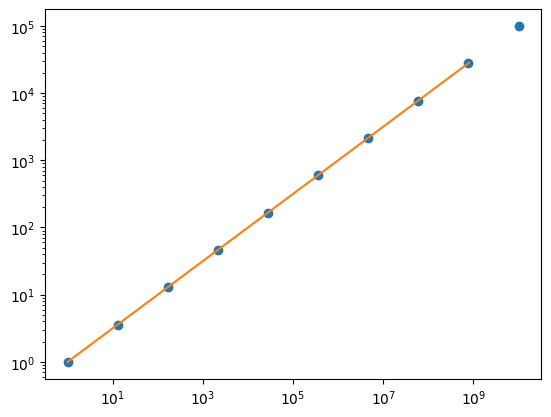

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

x = np.logspace(0, 10, 10)
y = np.logspace(0, 5, len(x))
f = interpolate.interp1d(np.log10(x), np.log10(y))
print(np.log10(x).min(), np.log10(x).max())
print(np.log10(xnew).min(), np.log10(xnew).max())

xnew = 10**np.arange(0, 9, 0.1)
ynew = 10**f(np.log10(xnew))   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')

plt.yscale('log'); plt.xscale('log')
plt.show()
